<a href="https://colab.research.google.com/github/sanjayi2000/MachineLearning/blob/main/2348552_MLLAB2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load the customer feedback dataset
df=pd.read_csv("/content/Netflix Userbase.csv")


In [ ]:
df.head()


,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [ ]:
# Create a new column called 'Repeatpurchase'
df['Repeatpurchase'] = ''

In [ ]:
df['Join Date'] = pd.to_datetime(df['Join Date'])
df['Last Payment Date'] = pd.to_datetime(df['Last Payment Date'])

# Calculate the difference in months between Join Date and Last Payment Date
df['Difference (months)'] = (df['Last Payment Date'].dt.year - df['Join Date'].dt.year) * 12 + df['Last Payment Date'].dt.month - df['Join Date'].dt.month

# Assign RepeatPurchase based on the difference in months
df['RepeatPurchase'] = df['Difference (months)'].apply(lambda x: 'Yes' if x > 1 else 'No')

# Display the result
print(df)

      User ID Subscription Type  Monthly Revenue  Join Date Last Payment Date  \
0           1             Basic               10 2022-01-15        2023-10-06   
1           2           Premium               15 2021-05-09        2023-06-22   
2           3          Standard               12 2023-02-28        2023-06-27   
3           4          Standard               12 2022-10-07        2023-06-26   
4           5             Basic               10 2023-01-05        2023-06-28   
...       ...               ...              ...        ...               ...   
2495     2496           Premium               14 2022-07-25        2023-12-07   
2496     2497             Basic               15 2022-04-08        2023-07-14   
2497     2498          Standard               12 2022-09-08        2023-07-15   
2498     2499          Standard               13 2022-12-08        2023-12-07   
2499     2500             Basic               15 2022-08-13        2023-12-07   

             Country  Age  

In [ ]:
# For each row, calculate the difference between the 'Join Date' and 'Last Payment Date'
for index, row in df.iterrows():
  join_date = row['Join Date']
  last_payment_date = row['Last Payment Date']
  difference = last_payment_date - join_date


In [ ]:
df.isnull()


,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,Repeatpurchase,Difference (months),RepeatPurchase
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,False,False,False,False,False,False,False,False,False,False,False,False,False
2496,False,False,False,False,False,False,False,False,False,False,False,False,False
2497,False,False,False,False,False,False,False,False,False,False,False,False,False
2498,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
#Grouped by age
df_grouped_by_age = df.groupby('Age')['User ID'].count()

In [ ]:
df.isnull().any()

User ID                False
Subscription Type      False
Monthly Revenue        False
Join Date              False
Last Payment Date      False
Country                False
Age                    False
Gender                 False
Device                 False
Plan Duration          False
Repeatpurchase         False
Difference (months)    False
RepeatPurchase         False
dtype: bool

In [ ]:
df_grouped_by_age.head()


Age
26      1
27     87
28    115
29    104
30    116
Name: User ID, dtype: int64

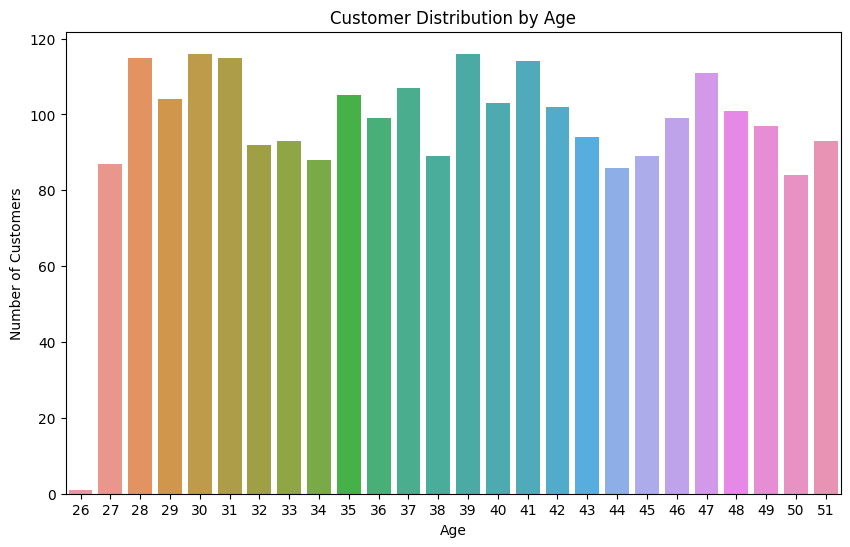

In [ ]:
# Create a bar plot of the customer distribution across age groups
plt.figure(figsize=(10, 6))
sns.barplot(x=df_grouped_by_age.index, y=df_grouped_by_age.values)
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.title('Customer Distribution by Age')
plt.show()

In [ ]:
# Convert categorical variables to numerical values
df['Gender_num'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['Repeatpurchase_num'] = df['Repeatpurchase'].map({'Yes': 1, 'No': 0})


In [ ]:
# Calculate the covariance matrix
covariance_matrix = df.corr(numeric_only=True)


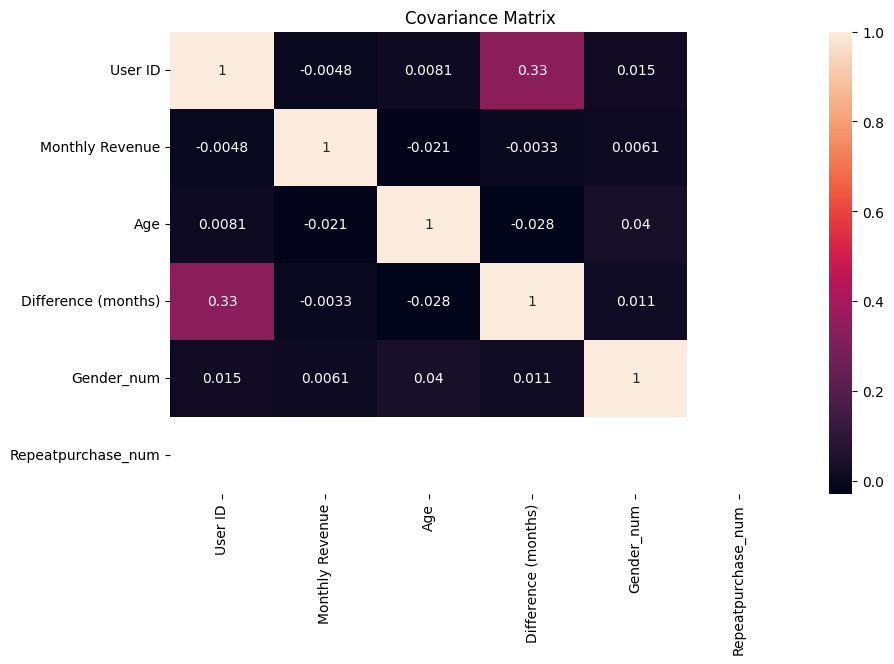

In [ ]:
# Visualize the covariance matrix using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(covariance_matrix, annot=True)
plt.title('Covariance Matrix')
plt.show()


In [ ]:
from scipy.stats import chi2_contingency


In [ ]:
contingency_table = pd.crosstab(df['RepeatPurchase'], df['Gender'])

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

Chi-square statistic: 0.03525581249732573
P-value: 0.8510606288626499
Degrees of freedom: 1
Expected frequencies:
 [[  11.0616   10.9384]
 [1245.9384 1232.0616]]


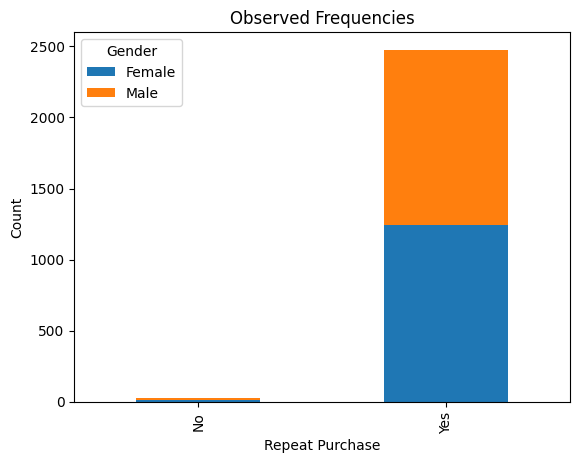

In [ ]:
contingency_table.plot(kind='bar', stacked=True)
plt.title('Observed Frequencies')
plt.xlabel('Repeat Purchase')
plt.ylabel('Count')
plt.show()